Профессия Data Science  
Блок 4. Введение в машинное обучение  
**ML-2. Обучение с учителем: регрессия**

---

## **✍ Оглавление:**

1. Введение 
2. Линейная регрессия: аналитическое решение
3. Метрики регрессии. Недостатки аналитического решения

---

## **1. Введение**

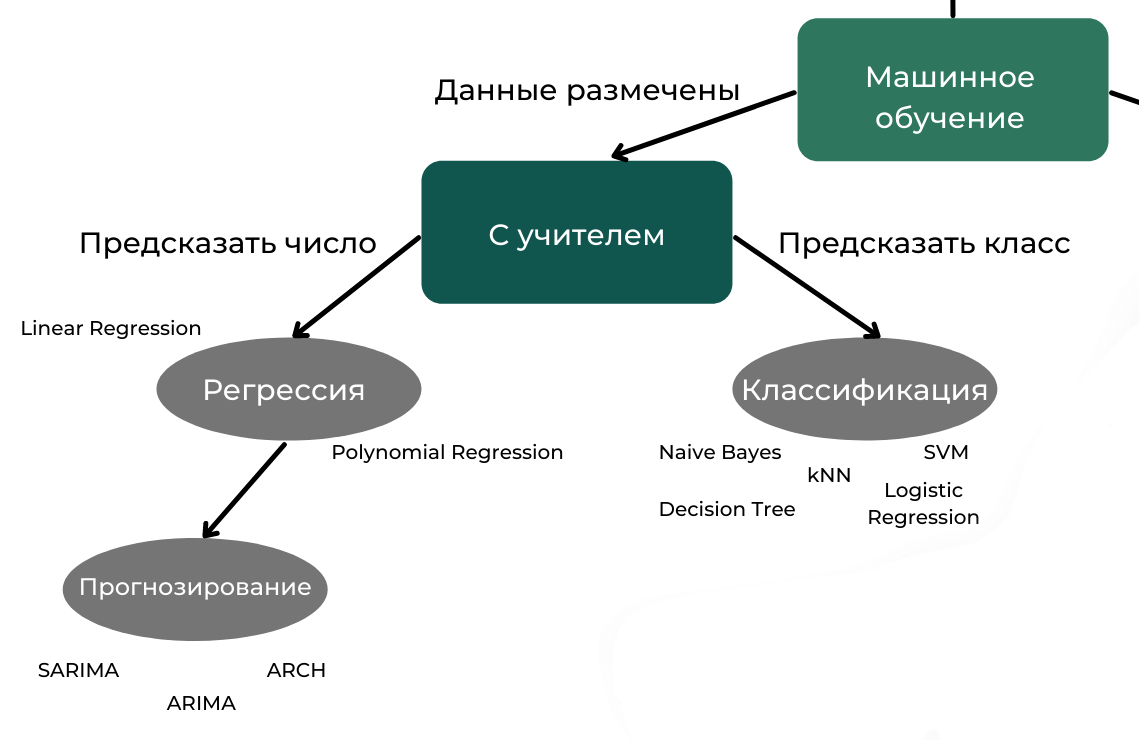

В категории обучения с учителем модели можно условно разделить на следующие основные типы:

- Линейные модели: линейная регрессия (для задачи регрессии) и логистическая регрессия (для задачи классификации) и производные от них.
- «Древесные» модели: дерево решений и производные от него. 
- Метрические алгоритмы: метод ближайших соседей и производные от него.
- Байесовские методы: метод наивного Байеса и производные от него.
-  Ансамблевые методы: композиции из методов (бэггинг, стекинг, бустинг).

**Линейные модели** — это модели, отображающие зависимость целевого признака от факторов в виде линейной взаимосвязи.

## **2. Линейная регрессия: аналитическое решение**

**Регрессия** — это класс задач обучения с учителем, когда по определённому набору признаков объекта необходимо предсказать числовую целевую переменную.

**Цель обучения** — построить модель, которая бы отражала зависимость между признаками и целевой числовой переменной.

Когда зависимость принимается линейной, такая модель называется линейной регрессией.

**<center> ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛИНЕЙНОЙ РЕГРЕССИИ </center>**

Линейная регрессия (Linear Regression) — одна из простейших моделей для решения задачи регрессии. Главная гипотеза состоит в том, что рассматриваемая зависимость является линейной.

**ПОИСК ПАРАМЕТРОВ ЛИНЕЙНОЙ РЕГРЕССИИ: МЕТОД НАИМЕНЬШИХ КВАДРАТОВ**

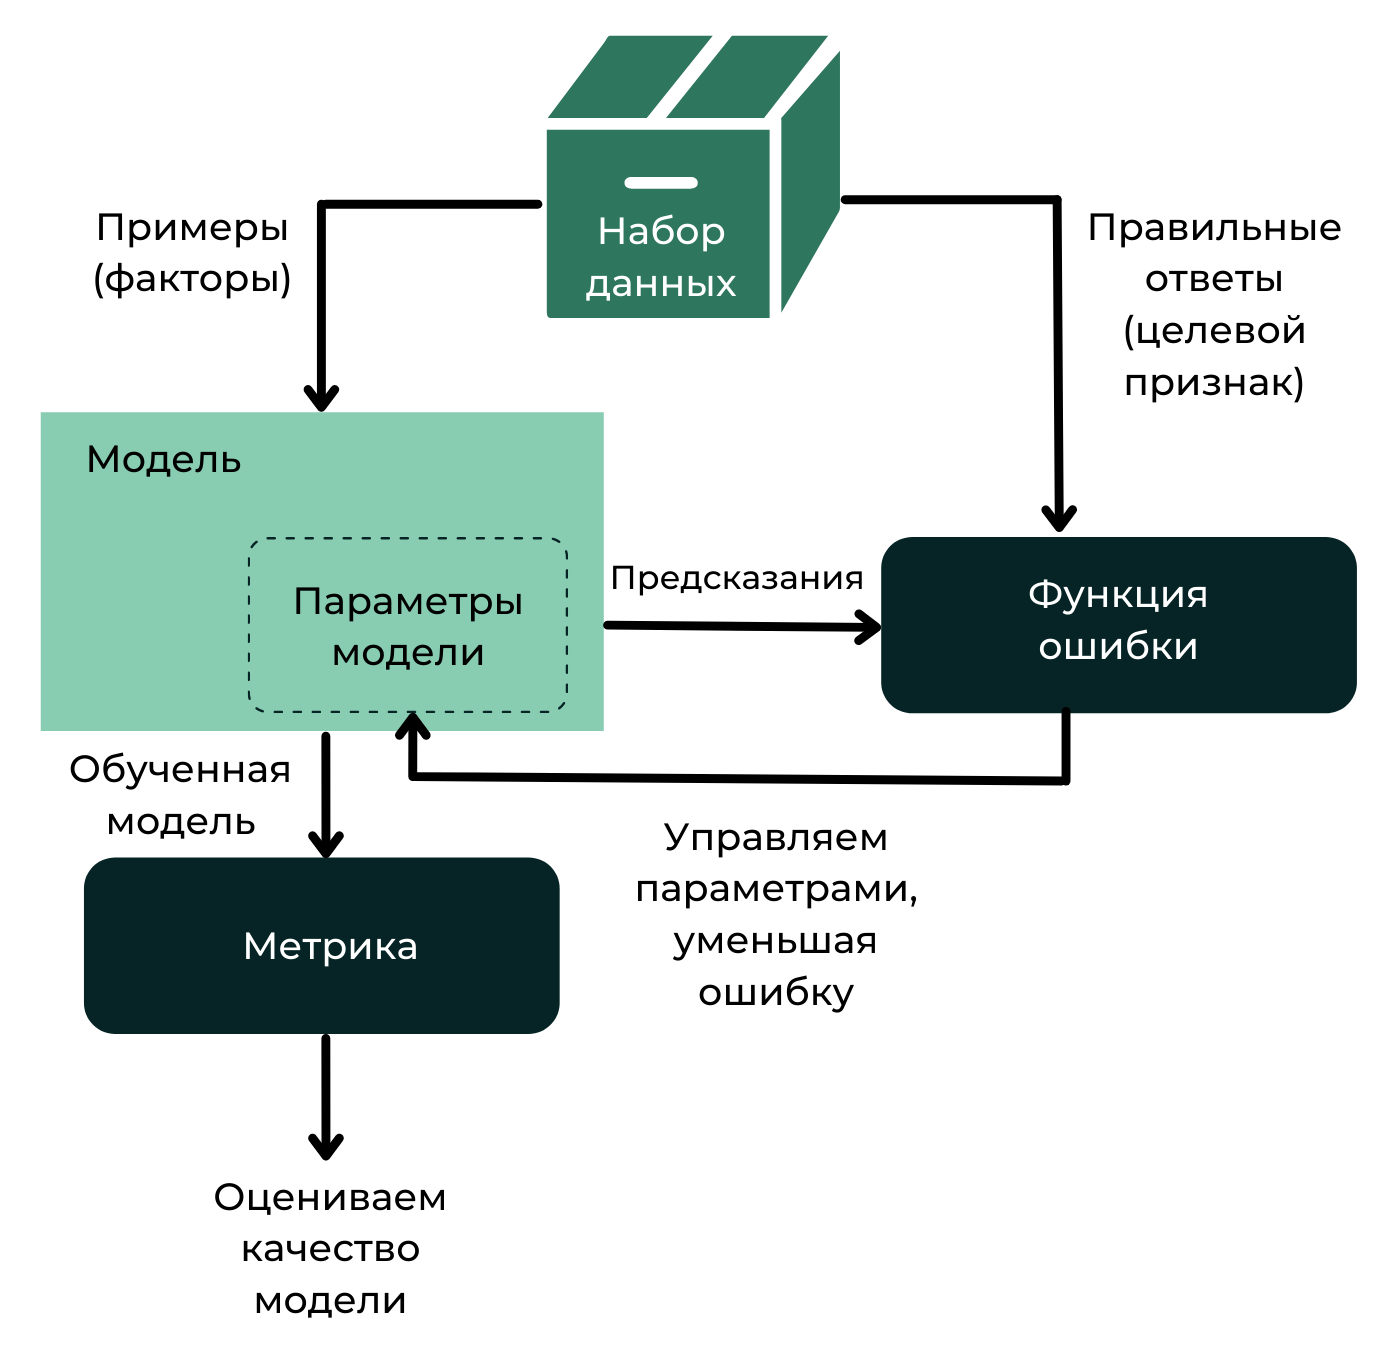

Согласно данной схеме обучения, поиск параметров производится путём минимизации некоторой функции ошибки. Математически мы пытаемся с помощью методов оптимизации найти такие параметры, чтобы ошибка была наименьшей из возможных.

Осталось только понять: где взять эту функцию ошибки? Ответ кроется в картинке ниже. Давайте представим, как могла бы выглядеть прямая в двумерном пространстве, проведённая, например, через пять точек:

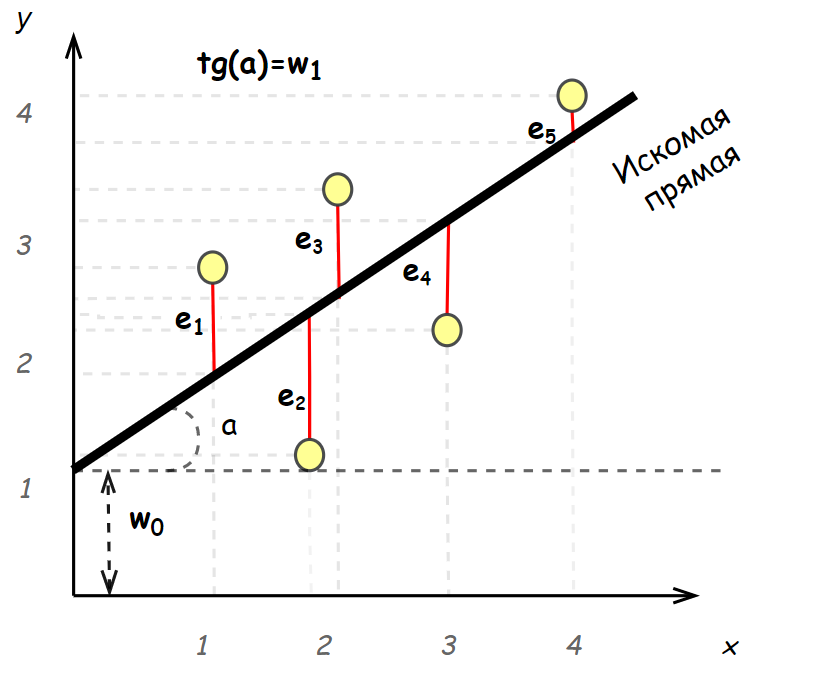

Что вообще есть **ошибка**? В самом простом понимании это расхождение между истиной и предсказанием.

Метод поиска параметров линейной регрессии называется методом наименьших квадратов (сокращённо — МНК) и был изобретён Гауссом ещё в 1795 году. В английской литературе часто можно встретить аббревиатуру OLS (Ordinary Least Squares).

**АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ NUMPY**

Вот какие этапы нам предстоит пройти, чтобы построить свою модель:

1. Загрузить данные и проанализировать датасет на предмет пропусков.
2. Подготовить данные для подачи в модель: избавиться от пропусков, если они есть, и перекодировать категориальные признаки, если они представлены текстом.
3. Построить модель. Будем строить несколько моделей линейной регрессии: первую — на одном признаке, вторую — на всех доступные признаках.
4. Оценить качество модели.

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
%matplotlib inline
plt.style.use('seaborn-v0_8')

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = pd.read_csv('Data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


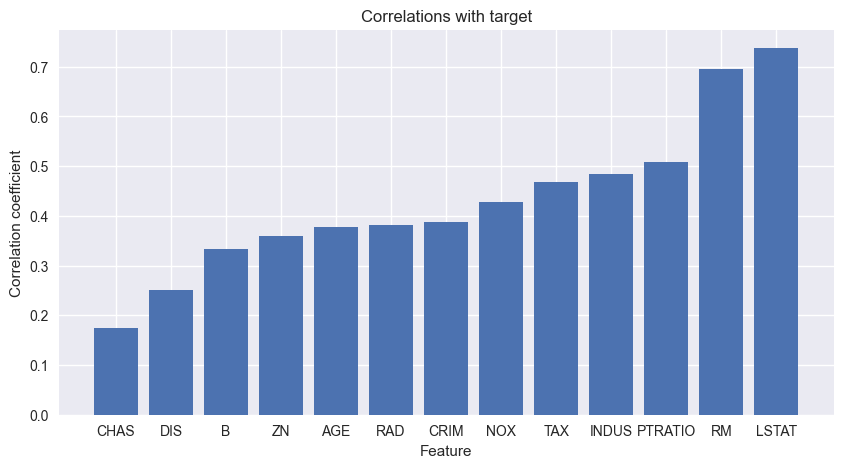

In [3]:
#Вычисляем модуль корреляции
corr_with_target = boston_data.corr()['MEDV'].abs().sort_values()
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('MEDV')
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5)) #фигура+координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y

Итак, самый коррелированный по модулю с медианной ценой (MEDV) признак — процент населения с низким статусом (LSTAT). Давайте построим линейную регрессию, используя этот признак.

**Примечание.** Построить линейную регрессию = обучить линейную регрессию = найти её параметры.

In [4]:
X = boston_data[['LSTAT']] #матрица наблюдений
y = boston_data['MEDV'] #вектор правильных ответов
X.head()
#y.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


In [5]:
def linear_regression(X, y):
    #Создаём вектор из единиц
    ones = np.ones(X.shape[0])
    #Добавляем вектор к таблице первым столбцом
    X = np.column_stack([ones, X])
    #Вычисляем обратную матрицу Q
    Q = np.linalg.inv(X.T @ X)
    #Вычисляем вектор коэффициентов
    w = Q @ X.T @ y
    return w

In [6]:
#Вычисляем параметры линейной регрессии
w = linear_regression(X, y)
#Выводим вычисленные значения параметров в виде вектора
print('Vector w: {}'.format(w))
#Выводим параметры с точностью до двух знаков после запятой
print('w0: {:.2f}'.format(w[0]))
print('w1: {:.2f}'.format(w[1]))
# Vector w: [34.55384088 -0.95004935]
# w0: 34.55
# w1: -0.95

Vector w: [34.55384088 -0.95004935]
w0: 34.55
w1: -0.95


In [7]:
#Задаём процент низкостатусного населения
x_example = 5.18 
#Делаем предсказание
y_predict = w[0] + w[1] * x_example
print('Predicted value: {:.2f}'.format(float(y_predict)))
# Predicted value: 29.63

Predicted value: 29.63


In [8]:
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4)) #фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') #диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') #линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда

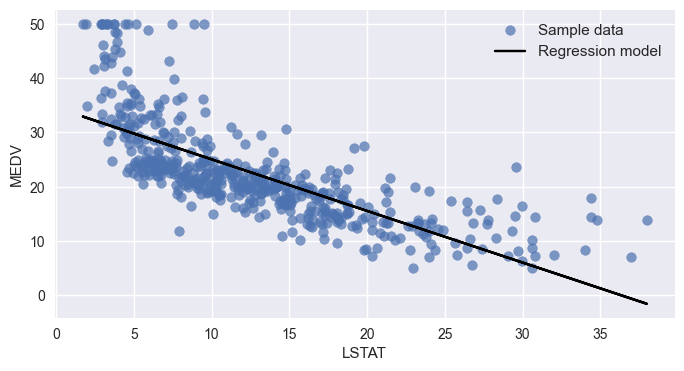

In [9]:
#Делаем предсказание для всех объектов из таблицы
y_predict = w[0] + w[1] * X
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

**АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ SKLEARN**

Алгоритм построения модели реализован в библиотеке машинного обучения sklearn и находится в модуле linear_model.

В модуле находится класс LinearRegression, который реализует аналитическое решение линейной регрессии. Для обучения модели необходимо просто вызвать метод fit(), передав в него матрицу наблюдений X и вектор правильных ответов y.

Данный метод реализует формулу метода наименьших квадратов и рассчитает параметры модели самостоятельно. 

In [10]:
from sklearn import linear_model

#Создаём объект класса LinearRegression
lr_lstat = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_lstat.fit(X, y)
 
print('w0: {}'.format(lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm

w0: 34.5538408793831
w1: [-0.95004935]


Модель обучена. А как сделать предсказание? Вручную записывать выражение для модели и подставлять коэффициенты? Конечно же, нет. Для этого есть метод predict(). В него необходимо передать матрицу наблюдений, для которых нужно сделать предсказание.

Давайте сделаем предсказание для всех наших наблюдений из таблицы X и визуализируем результат с помощью нашей функции plot_regression_2d():

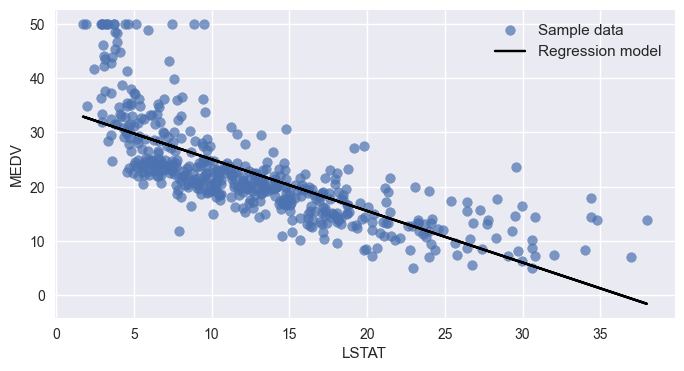

In [11]:
#Предсказываем медианную цену для всех участков из набора данных
y_predict = lr_lstat.predict(X)
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

In [12]:
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']
#Создаём объект класса LinearRegression
lr_full = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_full.fit(X, y)

LinearRegression()

In [13]:
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': lr_full .coef_})
#Составляем строку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': lr_full .intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


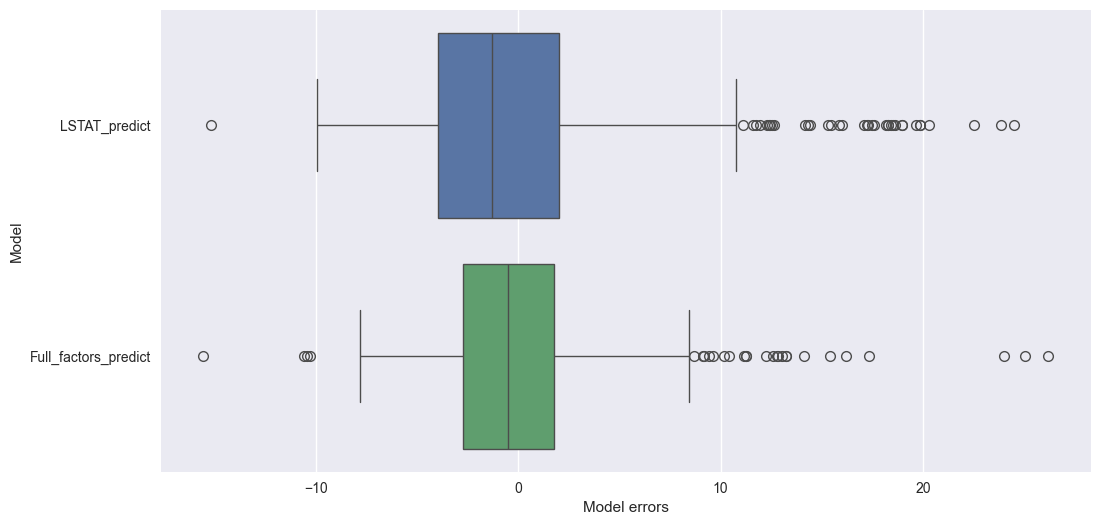

In [14]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на одном факторе LSTAT
y_errors_lstat = y - lr_lstat.predict(boston_data[['LSTAT']])
#Ошибки модели на всех факторах
y_errors_full = y - lr_full.predict(boston_data[features])
#Для удобства визуализации составим DataFrame из ошибок
errors_df = pd.DataFrame(
    {'LSTAT_predict': y_errors_lstat, 
     'Full_factors_predict': y_errors_full
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

In [21]:
# Задание 2.7

new = pd.DataFrame({'CRIM': [0.35114], 'ZN': [0.0], 'INDUS': [7.38],
           'CHAS': [0.0], 'NOX': [0.493], 'RM': [6.041],
           'AGE': [49.9], 'DIS': [4.7211], 'RAD': [5.0],
           'TAX': [287.0], 'PTRATIO': [19.6], 'B': [396.9],
           'LSTAT': [7.7]})
print(np.round(lr_full.predict(new), 2))

[22.87]


In [19]:
# Задание 2.8

def linear_regression(X, y):
    #Создаем вектор из единиц
    ones = np.ones(X.shape[0])
    #Добавляем вектор к таблице первым столбцом
    X = np.column_stack([ones, X])
    #Вычисляем обратную матрицу Q
    Q = np.linalg.inv(X.T @ X)
    #Вычисляем вектор коэффициентов
    w = Q @ X.T @ y
    return w

startups_data = pd.read_csv('data/50_Startups.csv')
#Разделяем факторы и целевой признак
X = startups_data[['R&D Spend', 'Administration', 'Marketing Spend']]
y = startups_data['Profit']

#Вычисляем параметры
w = linear_regression(X, y)
print('{:.2f}'.format(w[1]))
print('{:.2f}'.format(w[2]))
print('{:.2f}'.format(w[3]))

0.81
-0.03
0.03


## **3. Метрики регрессии. Недостатки аналитического решения**

**Метрика** — это численное выражение качества моделирования.

**<center> МЕТРИКИ РЕГРЕССИИ </center>**

**1. Средняя абсолютная ошибка — MAE (Mean Absolute Error):**

Чтобы посчитать данную метрику, нужно найти все остатки (разницы между предсказанным значением и реальным), взять от каждого из них модуль, сложить их и поделить на количество. Иными словами, нам нужно найти среднее арифметическое модуля отклонения предсказанного значения от реального.

Данная метрика интерпретируется очень легко: это число показывает, насколько в среднем наша модель ошибается. Чем меньше значение метрики, тем лучше.

**2. Средняя абсолютная ошибка в процентах — MAPE (Mean Absolute Percent Error):**

Для её вычисления мы делим модуль разницы между предсказанием алгоритма и истинным значением на истинное значение. Затем складываем все результаты (для каждого объекта), делим на количество и умножаем на 100 %.

Эта метрика показывает, на сколько процентов в среднем наше предсказание отклоняется от реального значения. Эта метрика отлично показывает себя в задачах, когда неизвестно, какое значение целевого показателя считать приемлемым.

**3. Средняя квадратическая ошибка — MSE:**

Данный показатель мы используем в линейной регрессии в качестве функции потерь, но ничто не мешает нам также использовать его и в качестве метрики.

Логика вычисления данной ошибки очень похожа на предыдущую. Разница лишь в том, что вместо модуля разности между предсказанным и реальным значениями мы берём квадрат этого модуля.

Данная метрика хуже поддаётся интерпретации, чем предыдущая, так как измеряется не в единицах, а в квадратах единиц. Она чаще используется для внутреннего обсуждения между дата-сайентистами, заказчику такая метрика может быть непонятна.

